In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

traffic_2015 = pd.read_csv("./data/dot_traffic_2015.txt.gz")
traffic_2015_stations = pd.read_csv("./data/dot_traffic_stations_2015.txt.gz")

In [16]:
%matplotlib notebook

In [4]:
print(traffic_2015.columns)
print(traffic_2015_stations.columns)

Index(['date', 'day_of_data', 'day_of_week', 'direction_of_travel',
       'direction_of_travel_name', 'fips_state_code',
       'functional_classification', 'functional_classification_name',
       'lane_of_travel', 'month_of_data', 'record_type', 'restrictions',
       'station_id', 'traffic_volume_counted_after_0000_to_0100',
       'traffic_volume_counted_after_0100_to_0200',
       'traffic_volume_counted_after_0200_to_0300',
       'traffic_volume_counted_after_0300_to_0400',
       'traffic_volume_counted_after_0400_to_0500',
       'traffic_volume_counted_after_0500_to_0600',
       'traffic_volume_counted_after_0600_to_0700',
       'traffic_volume_counted_after_0700_to_0800',
       'traffic_volume_counted_after_0800_to_0900',
       'traffic_volume_counted_after_0900_to_1000',
       'traffic_volume_counted_after_1000_to_1100',
       'traffic_volume_counted_after_1100_to_1200',
       'traffic_volume_counted_after_1200_to_1300',
       'traffic_volume_counted_after_1300_to_

In [5]:
lat_north = 33.506573
lat_south = 32.568381
long_west = 117.596359 
long_east = 116.081831
sd_traffic_2015_stations = traffic_2015_stations[(traffic_2015_stations["longitude"] <= long_west) \
                     & (traffic_2015_stations["longitude"] >= long_east) \
                     & (traffic_2015_stations["latitude"] <= lat_north) \
                     & (traffic_2015_stations["latitude"] >= lat_south)]
drop_columns = list(sd_traffic_2015_stations.columns.difference(['station_id','latitude','longitude']))
sd_traffic_2015_stations = sd_traffic_2015_stations.drop(drop_columns, axis = 1)
station_ids = sorted(sd_traffic_2015_stations["station_id"].unique())
for s in station_ids:
    latitude = 0
    longitude = 0
    locations = sd_traffic_2015_stations[sd_traffic_2015_stations["station_id"] == s].loc[:,"latitude":"longitude"]
    latitude = locations["latitude"].unique()
    longitude = locations["latitude"].unique()
    if latitude.size > 1:
        print("Station id",s,"has more than one latitude")
        print(latitude)
    elif longitude.size > 1:
        print("Station id",s,"has more than on longitude")
        print(longitude)
sd_traffic_2015 = traffic_2015[traffic_2015["station_id"].isin(station_ids)]
sd_traffic_2015_locations = pd.merge(sd_traffic_2015, sd_traffic_2015_stations,\
                                    left_on='station_id',right_on='station_id')
print(len(sd_traffic_2015_stations["station_id"].unique()))
print(len(sd_traffic_2015["station_id"].unique()))

print("IDs that were not found in the traffic dataset:")
for sd in station_ids:
    if sd not in sd_traffic_2015_locations["station_id"].unique():
        print(sd)

sd_station_ids = sd_traffic_2015_locations["station_id"].unique()

16
13
IDs that were not found in the traffic dataset:
116840
118250
118260


<IPython.core.display.Javascript object>


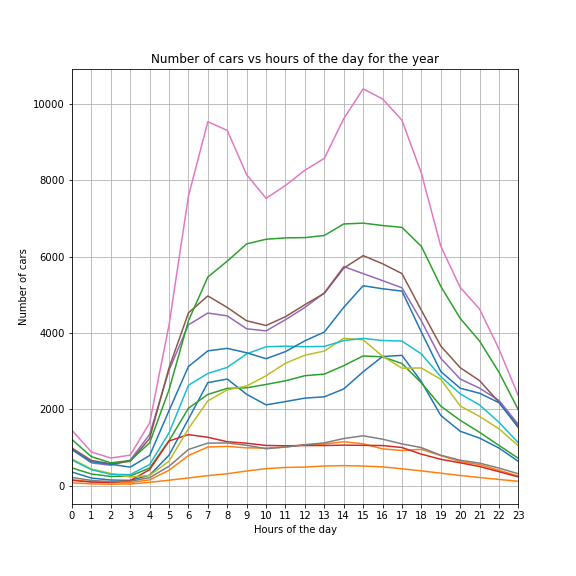

In [20]:
sd_traffic_mean_year = pd.DataFrame()
tmp = list()
for station in sd_station_ids:
    tmp = np.mean(sd_traffic_2015_locations[sd_traffic_2015_locations["station_id"] == station].loc\
                                [:,"traffic_volume_counted_after_0000_to_0100":\
                                 "traffic_volume_counted_after_2300_to_2400"])
    sd_traffic_mean_year[station] = tmp

fig = plt.figure(1,figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(0, 25, 1))
plt.title("Number of cars vs hours of the day for the year")
plt.xlabel("Hours of the day")
plt.ylabel("Number of cars")
plt.xlim((0,23))
for st in sd_station_ids:
    plt.plot(range(0,24,1),sd_traffic_mean_year[st])
#plt.legend()
plt.grid()
